<h1>Table of Contents</h1>

<div>
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#descriptive_stats">Data Descriptive Statistics</a></li>
        <li><a href="#visualize_data">Data Visualization</a></li>
        <li><a href="#text_data_preprocessing">Text Data Preprocessing</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>

In [1]:
import re
import nltk
from nltk.corpus import stopwords


In [2]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Run these once (separately if needed)


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy as np
# import mlflow
# import mlflow.sklearn


[nltk_data] Downloading package punkt to
[nltk_data]     e:\_DataScienc_KNaik\NLP\nlp\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     e:\_DataScienc_KNaik\NLP\nlp\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<!-- <h2 id="understanding_data" style="background-color: #f00b81ff; padding: 10px;">Understanding the Data</h2> -->

<h2 id="understanding_data">Understanding the Data</h2>

In [4]:
df = pd.read_csv(r'E:\_DataScienc_KNaik\NLP\Spam_HAM\data\smsspamcollection\SMSSpamCollection', sep='\t', names=['target', 'text'])
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['target'] = df.target.map({'ham':0, 'spam':1})
df.target.value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [6]:
print(f"Data shape: {df.shape}")
print('-'*35)
print(f"Data info : {df.info()}")
print('-'*35)
print(f"Missing in data:\n{df.isnull().sum()}")
print('-'*35)
print(f"Duplicates in data: {df.duplicated().sum()}")
print('-'*35)
df.drop_duplicates(inplace=True)
print(f"Data shape after dropping duplicates: {df.shape}")
print('-'*35)



Data shape: (5572, 2)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
Data info : None
-----------------------------------
Missing in data:
target    0
text      0
dtype: int64
-----------------------------------
Duplicates in data: 403
-----------------------------------
Data shape after dropping duplicates: (5169, 2)
-----------------------------------


In [7]:
# Apply sentence tokenizer to each message
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [8]:
# num of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [9]:
# num of sentences
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<h2 id="descriptive_stats">Data Descriptive Statistics</h2>

### Descriptive Stats  

    1. Overall descriptive stats for Number od characters, # words and # sentences
    2. Descriptive Stas for HAM features
    3. Descriptive stats for SPAM features

In [10]:
df[['num_characters','num_words','num_sent']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,79.344554,58.437457,2.0,36.0,61.0,119.0,910.0
num_words,5169.0,18.593538,13.402779,1.0,9.0,15.0,26.0,220.0
num_sent,5169.0,1.974076,1.458967,1.0,1.0,1.0,2.0,38.0


In [11]:
# HAM features
df[df['target'] == 0][['num_characters', 'num_words', 'num_sent']].describe().T


,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.905890,56.715046,2.0,34.0,53.0,91.0,910.0
num_words,4516.0,17.267715,13.588065,1.0,8.0,13.0,22.0,220.0
num_sent,4516.0,1.827724,1.394338,1.0,1.0,1.0,2.0,38.0


In [12]:
# SPAM features
df[df['target'] == 1][['num_characters', 'num_words', 'num_sent']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.704441,29.821348,13.0,132.0,148.0,157.0,223.0
num_words,653.0,27.762634,6.993008,2.0,25.0,29.0,32.0,46.0
num_sent,653.0,2.986217,1.494815,1.0,2.0,3.0,4.0,9.0


<h2 id="visualize_data">Data Visualization</h2>

target
0    4516
1     653
Name: count, dtype: int64
target
0    0.87367
1    0.12633
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Target Distribution')

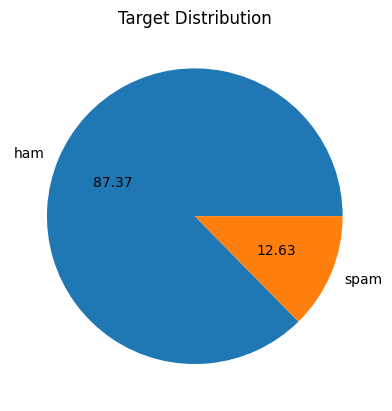

In [13]:
print(df.target.value_counts())
print(df.target.value_counts(normalize=True))


import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels = ['ham', 'spam'], autopct="%.2f")
plt.title('Target Distribution')

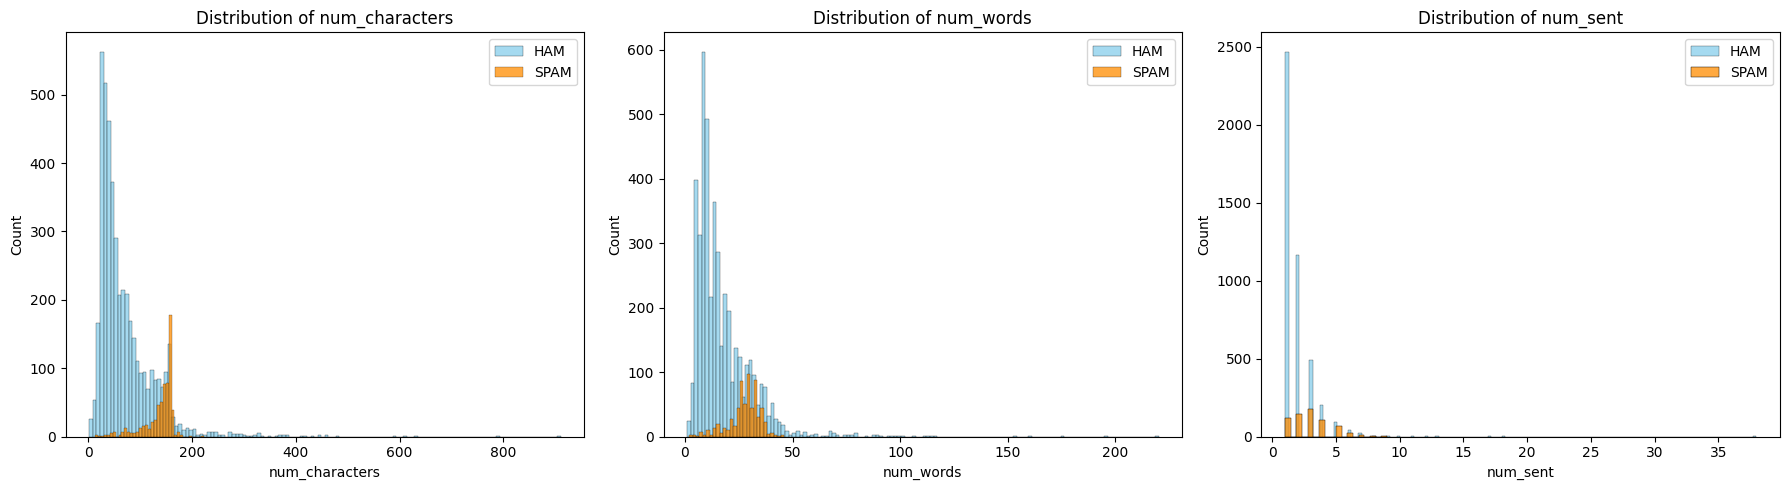

In [14]:
# Visualize num charcters HAM/SPAM
import seaborn as sns

COLS = df[['num_characters','num_words', 'num_sent']]

plt.figure(figsize=(18,5))

for i, col in enumerate(COLS,1):
    plt.subplot(1,3,i)
    sns.histplot(df[df['target']==0][col], color='skyblue', label = 'HAM')
    sns.histplot(df[df['target']==1][col], color='darkorange', label='SPAM')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

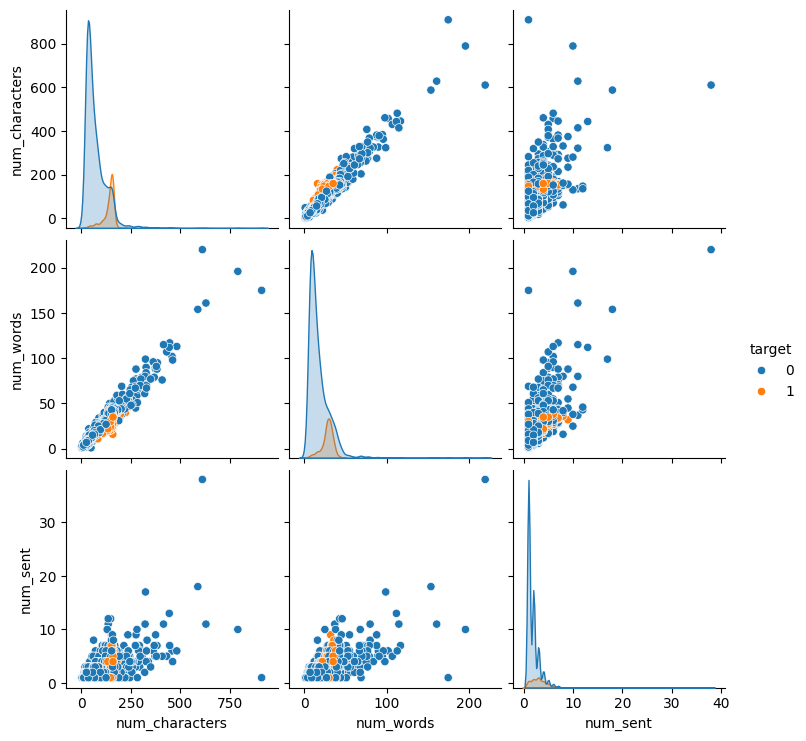

In [15]:
# Pairplot

sns.pairplot(data=df, hue='target')


<Axes: >

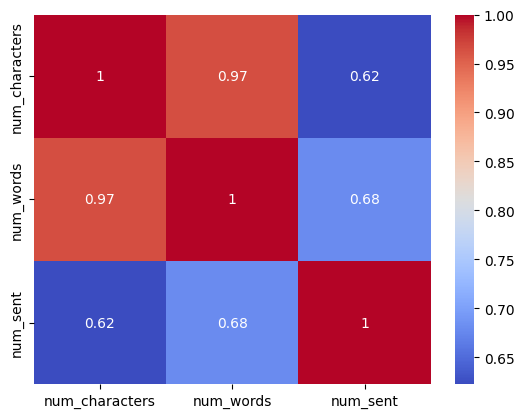

In [16]:
df_corr = df[['num_characters','num_words', 'num_sent']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

<h2 id="text_data_preprocessing">Text Data Preprocessing</h2>

#### DATA PREPROCESSING STEPS
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [17]:
snow = SnowballStemmer('english')
corpus = []
stop_words = set(stopwords.words('english'))


In [18]:
# Transform the text
def preprocess_text(text_series):
    """
    Cleans and preprocesses a pandas Series of text messages.

    Steps:
    - Remove non-letter characters
    - Convert to lowercase
    - Tokenize
    - Remove stopwords
    - Apply stemming
    - Join tokens back into a cleaned string

    Returns:
        List of cleaned messages (corpus)
    """
    corpus = []    
    # Process each message
    for text in text_series:
        review = re.sub('[^a-zA-Z]', ' ', text)                   # Remove non-letter characters
        review = review.lower()                                   # Lowercase
        review = word_tokenize(review)                            # Tokenization
        review = [snow.stem(word) for word in review if word not in stop_words]  # Remove stopwords + stemming
        review = " ".join(review)                                 # Join back to string
        corpus.append(review)
    return corpus


In [19]:
corpus = preprocess_text(df['text'])
print("Corpus created!")
df['cleaned_text'] = corpus
print(df.head())
print(f"Data shape: {df.shape}")

Corpus created!
   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sent                                       cleaned_text  
0         24         2  go jurong point crazi avail bugi n great world...  
1          8         2                              ok lar joke wif u oni  
2         37         2  free entri wkli comp win fa cup final tkts st ...  
3         13         1                u dun say earli hor u c alreadi say  
4         15         1               nah think goe usf live around though  
Data shape: (5169, 6)


## WordCloud for `target`

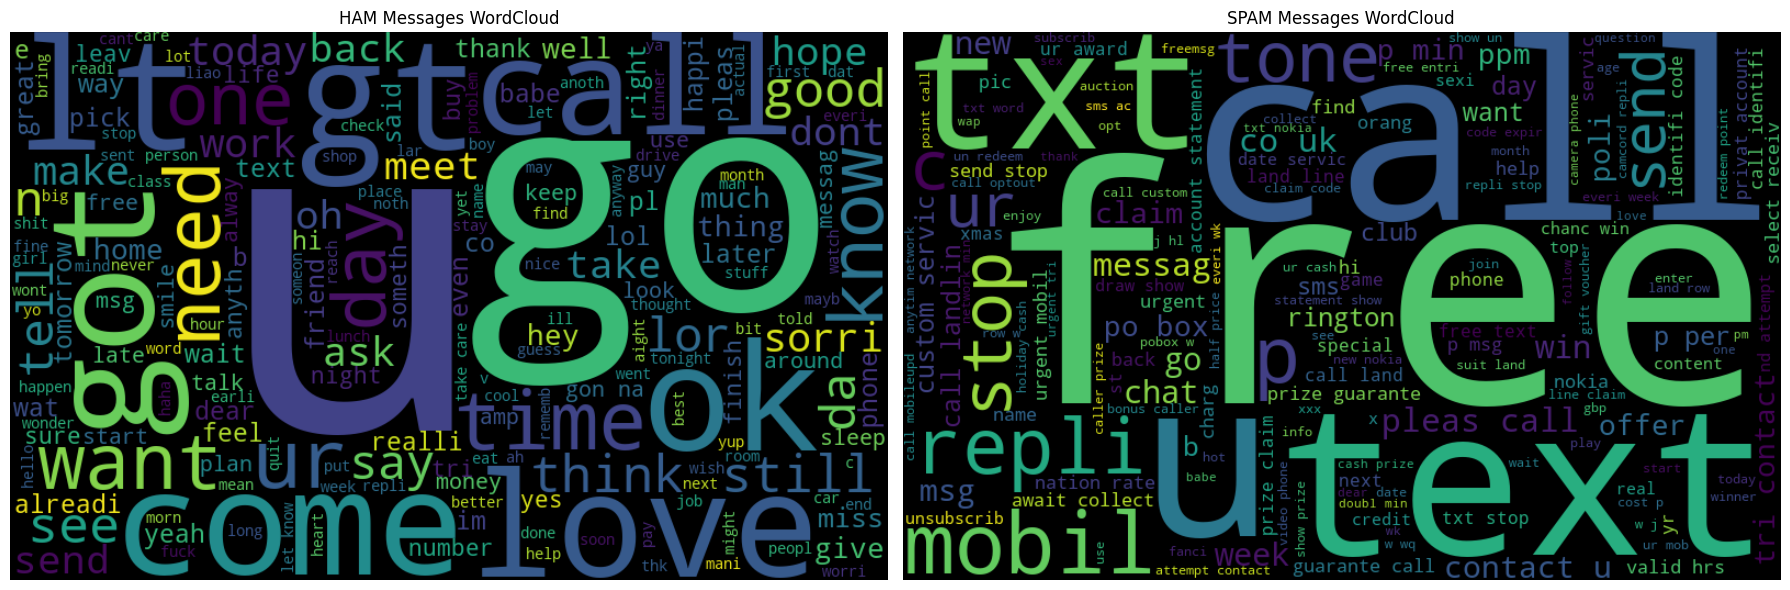

In [20]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=500, min_font_size=10, background_color='black')
COLS = 2

plt.figure(figsize=(18,8))

# HAM Wordcloud
plt.subplot(1,2,1)
ham_words = df[df['target']==0]['cleaned_text'].str.cat(sep=" ")
ham_wc = wc.generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("HAM Messages WordCloud")

# SPAM Wordcloud
plt.subplot(1,2,2)
spam_words = df[df['target']==1]['cleaned_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_words)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("SPAM Messages WordCloud")

plt.tight_layout()
plt.show()

In [21]:
# Get the most common words (Top 15) for HAM messages
ham_wc = WordCloud(width=800, height=500, min_font_size=10, background_color='black').generate(ham_words)
top_ham_words = ham_wc.words_

print("Top 15 Ham Words:")
for word, freq in list(top_ham_words.items())[:5]:
    print(f"{word}\t: {freq}")

# Get the most common words (Top 15) for SPAM messages
spam_wc = WordCloud(width=800, height=500, min_font_size=10, background_color='black').generate(spam_words)
top_spam_words = spam_wc.words_
print('-'*30)
print("\nTop 15 Spam Words:")
for word, freq in list(top_spam_words.items())[:5]:
    print(f"{word}\t: {freq}")

# Convert the top words dictionaries to DataFrame
top_ham_words_df = pd.DataFrame(list(top_ham_words.items()), columns=["Word", "Frequency"])
top_spam_words_df = pd.DataFrame(list(top_spam_words.items()), columns=["Word", "Frequency"])

import os
os.makedirs('words', exist_ok=True)

# Save to CSV
top_ham_words_df.to_csv('words\\ham_top_words.csv', index=False, sep='\t')
top_spam_words_df.to_csv('words\\spam_top_words.csv', index=False, sep='\t')
print('-'*30)
print("Top 15 WORDS saved successfully.")



Top 15 Ham Words:
u	: 1.0
go	: 0.40044493882091214
lt gt	: 0.2825361512791991
ok	: 0.26362625139043383
come	: 0.25472747497219134
------------------------------

Top 15 Spam Words:
free	: 1.0
call	: 0.9935064935064936
u	: 0.7727272727272727
text	: 0.6883116883116883
txt	: 0.6363636363636364
------------------------------
Top 15 WORDS saved successfully.


# Model Building  

- BagofWords
- TF-IDF
- Word2Vec

## SPLIT THE DATA into train and test datasets

In [22]:
y = df['target'].values
print("y shape:", y.shape)
y

## TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_text'], df['target'], test_size=0.2, random_state=24)

print(f"Train set shape: {X_train.shape} , {y_train.shape}")
print(f"Test set  shape: {X_test.shape} , {y_test.shape}")


y shape: (5169,)
Train set shape: (4135,) , (4135,)
Test set  shape: (1034,) , (1034,)


### Bag of Words using SKLEARN

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv_binary = CountVectorizer(max_features=3000,ngram_range=(1,2), binary=True)
X_train_bow = cv_binary.fit_transform(X_train).toarray()
X_test_bow = cv_binary.transform(X_test).toarray()

print("TRAIN BoW matrix shape:", X_train_bow.shape, y_train.shape)
# print(X_train_bow[:5])

print("TEST BoW matrix shape:", X_test_bow.shape, y_test.shape)
# print(X_test_bow[:5])


TRAIN BoW matrix shape: (4135, 3000) (4135,)
TEST BoW matrix shape: (1034, 3000) (1034,)


In [24]:
# # Step 3: Show results
# print("BoW matrix shape:", X_bow.shape)
# print("Sample vocabulary:", cv_binary.get_feature_names_out()[:10])

# # Step 4: Optional - convert to DataFrame for inspection
# df_bow = pd.DataFrame(X_bow, columns=cv_binary.get_feature_names_out())
# print(df_bow.head())
# df_bow.to_csv(r'words\\df_bow.csv', index=False)
# print('DF-BOW saved successfully!!!')

# TF-IDF

In [25]:
y = df['target'].values
print("y shape:", y.shape)
y

## TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_text'], df['target'], test_size=0.2, random_state=24)

print(f"Train set shape: {X_train.shape} , {y_train.shape}")
print(f"Test set  shape: {X_test.shape} , {y_test.shape}")


y shape: (5169,)
Train set shape: (4135,) , (4135,)
Test set  shape: (1034,) , (1034,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
tv = TfidfVectorizer(max_features=3000, ngram_range=(1,2))

X_train_tv = tv.fit_transform(X_train).toarray()
X_test_tv = tv.transform(X_test).toarray()

print("TRAIN TF-IDF matrix shape:", X_train_tv.shape, y_train.shape)
print("TEST TF-IDF matrix shape:", X_test_tv.shape, y_train.shape)

with open('models/vectorizer.pkl', 'wb') as f:
    pickle.dump(tv, f)
    print('Vectorizer saved succesfully')

TRAIN TF-IDF matrix shape: (4135, 3000) (4135,)
TEST TF-IDF matrix shape: (1034, 3000) (4135,)
Vectorizer saved succesfully


In [27]:
# print(f"TF-IDF Matrix shape: ", X_tfidf.shape)
# print("Sample vocabulary:", tfidf.get_feature_names_out()[:25])

# df_tfidf = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())
# print(df_tfidf.head())
# df_tfidf.to_csv(r'words\\df_tfidf.csv', index=False)
# print('DF-TF-IDF saved successfully!!!')

In [28]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features=3000)

# X = tfidf.fit_transform(df['cleaned_text']).toarray()

In [29]:
# X = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
# X


### MODELS TRAINING

In [30]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_curve, auc
import pickle
import mlflow

## Base Model Training

In [31]:
models = {
    # 'svc' : SVC(gamma='auto',probability=True),
    # 'knn' : KNeighborsClassifier(),
    'mnb' : MultinomialNB(),
    'dtc' : DecisionTreeClassifier(max_depth=5),
    'lrc' : LogisticRegression(solver='liblinear', penalty='l1'),
    'rfc' : RandomForestClassifier(n_estimators=50, random_state=2),
    'abc' : AdaBoostClassifier(n_estimators=50, random_state=2),
    'gbdt' : GradientBoostingClassifier(n_estimators=50,random_state=2),
    'xgb' : XGBClassifier(n_estimators=50,random_state=2),
}

# # Set the MLflow tracking URI
mlflow.set_tracking_uri(r"file:///E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns")


# Set up the MLflow experiment
mlflow.set_experiment('BASE_Experiment')

report = []

for name, model in models.items():
    with mlflow.start_run() as run: # Start a new MLflow run for each model
        print(f"MLflow Run started with run_id: {run.info.run_id}")
        print(f"Training {name} model...")
        
        # Train model
        model.fit(X_train_tv, y_train)
        y_pred_train = model.predict(X_train_tv)
        y_pred_test = model.predict(X_test_tv)

        # Save the non-tuned model as well
        with open(f"models/{name}_base_model.pkl", 'wb') as f:
            pickle.dump(model, f)

        # Evaluate
        print(f"Model : {name}")
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        # Classification report for precision, recall, f1-score
        class_report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)
        precision = class_report['1']['precision']
        recall = class_report['1']['recall']
        f1_score = class_report['1']['f1-score']

        report.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision (SPAM)': precision,
            'Recall (SPAM)': recall,
            'F1-Score (SPAM)': f1_score
        })

        # Log metrics and model to MLflow
        mlflow.log_param("Model Name", name)
        mlflow.log_metric("Train Accuracy", train_acc)
        mlflow.log_metric("Test Accuracy", test_acc)
        mlflow.log_metric("Precision_SPAM", precision)
        mlflow.log_metric("Recall_SPAM", recall)
        mlflow.log_metric("F1-Score_SPAM", f1_score)
        
        # Log the model itself
        mlflow.sklearn.log_model(model, name=f"{name}_model")

                # Generate and save confusion matrix image
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        cm_image_path = f'artifacts\\images\\cm_base_{name}.png'
        plt.savefig(cm_image_path)
        plt.close()
        
        # Log confusion matrix image to MLflow
        mlflow.log_artifact(cm_image_path)

        # Generate and save ROC curve image
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tv)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc='lower right')
        roc_image_path = f'artifacts\\roc\\roc_base_{name}.png'
        plt.savefig(roc_image_path)
        plt.close()

        # Log ROC curve image to MLflow
        mlflow.log_artifact(roc_image_path)

# Create and save the report dataframe
reports_df = pd.DataFrame(report).sort_values(by='F1-Score (SPAM)', ascending=False)
reports_df.to_csv('report/base_performance.csv', index=False)

# Print the final model performance report
print(reports_df)

2025/08/20 17:21:40 INFO mlflow.tracking.fluent: Experiment with name 'BASE_Experiment' does not exist. Creating a new experiment.


MLflow Run started with run_id: 06ee80fe58be4bc8b765e93710c47397
Training mnb model...
Model : mnb


2025/08/20 17:21:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: 7b1b628d388d4c6b8cb8da133700c6b3
Training dtc model...
Model : dtc


2025/08/20 17:22:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: b1fa28a6cd18460b9f2b62e7fd3faab3
Training lrc model...
Model : lrc


2025/08/20 17:22:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: d1397ce602324015881db432cedee501
Training rfc model...
Model : rfc


2025/08/20 17:22:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: feb9dd4f4f4c41a38ddfe695ce30c043
Training abc model...
Model : abc


2025/08/20 17:23:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: c0c8db36e56f40209c3f289c9d78226b
Training gbdt model...
Model : gbdt


2025/08/20 17:24:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: ce60946fcdad455993e4cc34f1b9bd0d
Training xgb model...
Model : xgb


2025/08/20 17:24:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


  Model  Train Accuracy  Test Accuracy  Precision (SPAM)  Recall (SPAM)  \
3   rfc        0.999033       0.976789          0.990909       0.825758   
0   mnb        0.981378       0.975822          1.000000       0.810606   
2   lrc        0.968319       0.959381          0.901786       0.765152   
6   xgb        0.989359       0.957447          0.872881       0.780303   
5  gbdt        0.973156       0.947776          0.875000       0.689394   
1   dtc        0.957678       0.937137          0.801802       0.674242   
4   abc        0.935671       0.930368          0.806122       0.598485   

   F1-Score (SPAM)  
3         0.900826  
0         0.895397  
2         0.827869  
6         0.824000  
5         0.771186  
1         0.732510  
4         0.686957  


In [32]:
models = {
    'mnb' : MultinomialNB(),
    'rfc' : RandomForestClassifier(n_estimators=50, random_state=2),
    'lrc' : LogisticRegression(solver='liblinear', penalty='l1'),
    'xgb' : XGBClassifier(n_estimators=50,random_state=2),
}

# Set the MLflow tracking URI
mlflow.set_tracking_uri(r'file:///E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns')

# Set up the MLflow experiment
mlflow.set_experiment('Exp_1')

report = []

for name, model in models.items():
    with mlflow.start_run() as run: # Start a new MLflow run for each model
        print(f"MLflow Run started with run_id: {run.info.run_id}")
        print(f"Training {name} model...")
        
        # Train model
        model.fit(X_train_tv, y_train)
        y_pred_train = model.predict(X_train_tv)
        y_pred_test = model.predict(X_test_tv)

        # Save the non-tuned model as well
        with open(f"models/{name}_Exp_1_model.pkl", 'wb') as f:
            pickle.dump(model, f)

        # Evaluate
        print(f"Model : {name}")
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        # Classification report for precision, recall, f1-score
        class_report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)
        precision = class_report['1']['precision']
        recall = class_report['1']['recall']
        f1_score = class_report['1']['f1-score']

        report.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision (SPAM)': precision,
            'Recall (SPAM)': recall,
            'F1-Score (SPAM)': f1_score
        })

        # Log metrics and model to MLflow
        mlflow.log_param("Model Name", name)
        mlflow.log_metric("Train Accuracy", train_acc)
        mlflow.log_metric("Test Accuracy", test_acc)
        mlflow.log_metric("Precision_SPAM", precision)
        mlflow.log_metric("Recall_SPAM", recall)
        mlflow.log_metric("F1-Score_SPAM", f1_score)
        
        # Log the model itself
        # mlflow.sklearn.log_model(model, f"{name}_model")
        mlflow.sklearn.log_model(model, name=f"{name}_model")

        # Generate and save confusion matrix image
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        cm_image_path = f'artifacts\\images\\cm_Exp_1_{name}.png'
        plt.savefig(cm_image_path)
        plt.close()
        
        # Log confusion matrix image to MLflow
        mlflow.log_artifact(cm_image_path)
        

        # Generate and save ROC curve image
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tv)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc='lower right')
        roc_image_path = f'artifacts\\roc\\roc_Exp_1_{name}.png'
        plt.savefig(roc_image_path)
        plt.close()

        # Log ROC curve image to MLflow
        mlflow.log_artifact(roc_image_path)

# Create and save the report dataframe
reports_df = pd.DataFrame(report).sort_values(by='F1-Score (SPAM)', ascending=False)
reports_df.to_csv('report/Exp_1_performance.csv', index=False)

# Print the final model performance report
print(reports_df)

2025/08/20 17:24:31 INFO mlflow.tracking.fluent: Experiment with name 'Exp_1' does not exist. Creating a new experiment.


MLflow Run started with run_id: aaea27801717451eb14f70a0a8232d95
Training mnb model...
Model : mnb


2025/08/20 17:24:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: 45f2c8ef5e0e447981d409a091be256a
Training rfc model...
Model : rfc


2025/08/20 17:25:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: c37c47a235c54615a15d362089623894
Training lrc model...
Model : lrc


2025/08/20 17:25:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: c5718ad3b2134949b897b6119063e7d7
Training xgb model...
Model : xgb


2025/08/20 17:25:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


  Model  Train Accuracy  Test Accuracy  Precision (SPAM)  Recall (SPAM)  \
1   rfc        0.999033       0.976789          0.990909       0.825758   
0   mnb        0.981378       0.975822          1.000000       0.810606   
2   lrc        0.968319       0.960348          0.909910       0.765152   
3   xgb        0.989359       0.957447          0.872881       0.780303   

   F1-Score (SPAM)  
1         0.900826  
0         0.895397  
2         0.831276  
3         0.824000  


In [33]:
# mlflow_directory = "E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns"

# # Create the directory if it doesn't exist
# if not os.path.exists(mlflow_directory):
#     os.makedirs(mlflow_directory)



In [34]:

# import os
# # Ensure the 'report' directory exists
# os.makedirs('report', exist_ok=True)

# # Save the DataFrame to a CSV file
# reports_df.to_csv(r'report/base_model_performance.csv', index=False)

# print("Base Model performance report saved successfully.")

In [35]:
# # List all runs for the experiment
# experiment_id = 'Spam_HAM/mlruns/724549202389189004/940d003b54fa4624b26981c4ca3bbd5c'  # your experiment_id
# runs = mlflow.search_runs(experiment_ids=[experiment_id])

# # Print the runs
# print(runs)


# HYPERPARAMETER TUNING

In [36]:
# Define the models and parameter grids
models = {
    'mnb' : MultinomialNB(),
    'rfc' : RandomForestClassifier(n_estimators=50, random_state=2),
    'lrc' : LogisticRegression(solver='liblinear', penalty='l1'),
    'xgb' : XGBClassifier(n_estimators=50,random_state=2),
}

param_grids = {
    'mnb': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'rfc': {
        'n_estimators': [100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'xgb': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'lrc':{
        'penalty': ['l1', 'l2', 'none'],        # Regularization type
        'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength
        'max_iter': [100, 200]
    }
}

# Set the MLflow tracking URI
mlflow.set_tracking_uri(r'file:///E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns')

# Track experiments with MLflow
mlflow.set_experiment('Exp_2_HT')

best_model = None
best_model_name = ""
best_accuracy = 0
best_f1 = 0
report = []

# Iterate through models and perform hyperparameter tuning
for name, model in models.items():
    with mlflow.start_run() as run: # Start a new MLflow run for each model
        print(f"MLflow Run started with run_id: {run.info.run_id}")
        print(f"Training model: {name}")
        
        # Apply GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train_tv, y_train)
        
        best_params = grid_search.best_params_
        best_model_found = grid_search.best_estimator_

        print(f"Best parameters for {name}: {best_params}")

        # Save model after hyperparameter tuning
        with open(f"models/tuned_{name}.pkl", 'wb') as f:
            pickle.dump(best_model_found, f)

        # Predict using the tuned model
        y_pred_train = best_model_found.predict(X_train_tv)
        y_pred_test = best_model_found.predict(X_test_tv)

        # Evaluate the model
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        # f1 = f1_score(y_test, y_pred_test)

        class_report = classification_report(y_test, y_pred_test, output_dict=True)
        precision = class_report['1']['precision']
        recall = class_report['1']['recall']
        f1_spam = class_report['1']['f1-score']  # ✅ Safe


        # Log metrics and model to MLflow
        mlflow.log_param('model_name', name)
        mlflow.log_param('best_params', best_params)
        mlflow.log_metric('Train Accuracy', train_acc)
        mlflow.log_metric('Test Accuracy', test_acc)
        mlflow.log_metric('Precision SPAM', precision)
        mlflow.log_metric('Recall SPAM', recall)
        mlflow.log_metric('F1-Score SPAM', f1_spam)

        # Log the tuned model
        mlflow.sklearn.log_model(best_model_found, name=f'model_{name}')

        # Generate and save confusion matrix image
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        cm_image_path = f'artifacts\\images\\cm_Exp_2_{name}.png'
        plt.savefig(cm_image_path)
        plt.close()
        
        # Log confusion matrix image to MLflow
        mlflow.log_artifact(cm_image_path)
        

        # Generate and save ROC curve image
        fpr, tpr, _ = roc_curve(y_test, best_model_found.predict_proba(X_test_tv)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc='lower right')
        roc_image_path = f'artifacts\\roc\\roc_Exp_2_{name}.png'
        plt.savefig(roc_image_path)
        plt.close()

        # Log ROC curve image to MLflow
        mlflow.log_artifact(roc_image_path)

        # Compare models and save the best one
        if f1_spam > best_f1:
            best_accuracy = test_acc
            best_f1 = f1_spam
            best_model_name = name
            best_model = best_model_found

        # Append results to the report list
        report.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision (SPAM)': precision,
            'Recall (SPAM)': recall,
            'F1-Score (SPAM)': f1_spam,
            'Best Params': str(best_params)
        })

# Final Report: Save the results in a DataFrame
final_reports_df = pd.DataFrame(report).sort_values(by='F1-Score (SPAM)', ascending=False)
final_reports_df.to_csv('report/tuned_model_performance.csv', index=False)

# Save the best model as the final model
with open(f"models/final_model.pkl", 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model saved as final_model.pkl: {best_model_name} with F1-Score: {best_f1:.4f}")


2025/08/20 17:25:30 INFO mlflow.tracking.fluent: Experiment with name 'Exp_2_HT' does not exist. Creating a new experiment.


MLflow Run started with run_id: 9a3f2ca5bafe47ceb702a914d9cb94e9
Training model: mnb
Best parameters for mnb: {'alpha': 0.1}


2025/08/20 17:25:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: 45fe00e97c19476092f63de638637ce7
Training model: rfc
Best parameters for rfc: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


2025/08/20 17:27:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: 94e1e4614b2d4e6696f5f9da7b2af441
Training model: lrc


e:\_DataScienc_KNaik\NLP\nlp\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "e:\_DataScienc_KNaik\NLP\nlp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\_DataScienc_KNaik\NLP\nlp\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "e:\_DataScienc_KNaik\NLP\nlp\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "e:\_DataScienc_KNaik\NLP\n

Best parameters for lrc: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}


2025/08/20 17:27:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow Run started with run_id: 1c9bc73bd1754f358dba47be636ef8ee
Training model: xgb
Best parameters for xgb: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 50}


2025/08/20 17:33:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model saved as final_model.pkl: lrc with F1-Score: 0.9412


## Final Model

In [38]:
# Define the models and parameter grids
models = {
    # 'mnb' : MultinomialNB(alpha=0.1),
    # 'rfc' : RandomForestClassifier(max_depth= 20, min_samples_split= 5, n_estimators=100, random_state=2),
    'lrc' : LogisticRegression(C= 100, max_iter= 100, penalty= 'l2'),
    # 'xgb' : XGBClassifier(learning_rate= 0.5, max_depth= 7, n_estimators=50,random_state=2),
}


# Set the MLflow tracking URI
mlflow.set_tracking_uri(r'file:///E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns')

# Set up the MLflow experiment
mlflow.set_experiment('Final_Model')

report = []

for name, model in models.items():
    with mlflow.start_run() as run: # Start a new MLflow run for each model
        print(f"MLflow Run started with run_id: {run.info.run_id}")
        print(f"Training {name} model...")
        
        # Train model
        model.fit(X_train_tv, y_train)
        y_pred_train = model.predict(X_train_tv)
        y_pred_test = model.predict(X_test_tv)

        # Save the non-tuned model as well
        with open(f"models/{name}_FM_model.pkl", 'wb') as f:
            pickle.dump(model, f)

        # Evaluate
        print(f"Model : {name}")
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)

        # Classification report for precision, recall, f1-score
        class_report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)
        precision = class_report['1']['precision']
        recall = class_report['1']['recall']
        f1_score = class_report['1']['f1-score']

        report.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision (SPAM)': precision,
            'Recall (SPAM)': recall,
            'F1-Score (SPAM)': f1_score
        })

        # Log metrics and model to MLflow
        mlflow.log_param("Model Name", name)
        mlflow.log_metric("Train Accuracy", train_acc)
        mlflow.log_metric("Test Accuracy", test_acc)
        mlflow.log_metric("Precision_SPAM", precision)
        mlflow.log_metric("Recall_SPAM", recall)
        mlflow.log_metric("F1-Score_SPAM", f1_score)
        
        # Log the model itself
        # mlflow.sklearn.log_model(model, f"{name}_model")
        mlflow.sklearn.log_model(model, name=f"{name}_FM_model")

        # Generate and save confusion matrix image
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        cm_image_path = f'artifacts\\images\\cm_FM_{name}.png'
        plt.savefig(cm_image_path)
        plt.close()
        
        # Log confusion matrix image to MLflow
        mlflow.log_artifact(cm_image_path)
        

        # Generate and save ROC curve image
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tv)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc='lower right')
        roc_image_path = f'artifacts\\roc\\roc_FM_{name}.png'
        plt.savefig(roc_image_path)
        plt.close()

        # Log ROC curve image to MLflow
        mlflow.log_artifact(roc_image_path)

# Create and save the report dataframe
reports_df = pd.DataFrame(report).sort_values(by='F1-Score (SPAM)', ascending=False)
reports_df.to_csv('report/FM_performance.csv', index=False)

# Print the final model performance report
print(reports_df)


MLflow Run started with run_id: 704fd2111d714b1db39fe5f121338418
Training lrc model...
Model : lrc


2025/08/20 17:35:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


  Model  Train Accuracy  Test Accuracy  Precision (SPAM)  Recall (SPAM)  \
0   lrc        0.999274       0.984526          0.967742       0.909091   

   F1-Score (SPAM)  
0           0.9375  


In [ ]:
# mlflow ui --backend-store-uri file:/E:/_DataScienc_KNaik/NLP/Spam_HAM/mlruns